Please Fill in your name below:

In [ ]:
NAME = "Somaia Ahmed Abdelrahman"

---

# Deep Learning
# Assignment 2: Neural Networks

**Please follow the following instructions for your answers to be graded correctly**:
- Do not change any of the functions names.
- Inside the functions, make sure to write your code between the comments "# YOUR CODE STARTS HERE " and "# YOUR CODE ENDS HERE ". **Do not** edit any code outside these comments inside the functions.
- You're allowed to edit the cells that don't contain function definition.
- You will encounter some locked (read-only) and empty cells. Leave those as they are, you're not allowed to edit them.
- Before you submit your assignment, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Regression using Tensorflow Model

In [ ]:
import pandas as pd

### Data
The medical insurance dataset attached with the assignment aims to predict the individual medical costs billed by health insurance based on some features: age, sex, bmi, children, smoker, region.

**Write the following function 'get_insurance_data' which does the following:**
- Reads the Medical insurance data (attached with the assignment) into a pandas dataframe
- Normalize the numerical features to the range [0, 1]
- Numerically encoding the categorical features. Note that there are generally two ways to do this:
    - Ordinal Encoding: Used for data that has natural ordering. eg. a feature describing How happy a customer is with service:\
Extremely Happy – 1 \
Happy – 2\
Neutral – 3\
Unhappy – 4 \
Extremely Unhappy – 5
    - One-Hot Encoding: Used for data that has no natural ordering. eg. a feature containing the breed of a dog: Doberman - Dalmatian - Labrador - German Shepherd. These can't be encoded as 0, 1, 2 and 3 because they have no natural ordering.
- Standardize the target label to zero mean and std 1. (Due to large range of the target values)
- Split the data into training and testing sets with ratio 3:1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
def get_insurance_data(data_path):
    '''
    Read and preprocess the insurance data

    Arguments:
    data_path: the path of the insurance data file.

    Returns:
    x_train: training data array with shape (num of training samples, num of features)
    x_test: training data array with shape (num of testing samples, num of features)
    y_train: training labels array with shape (num of training samples,)
    y_test: testing labels array with shape (num of testing samples,)
    '''
    # YOUR CODE STARTS HERE
    # Reads the Medical insurance data (attached with the assignment) into a pandas dataframe
    df = pd.read_csv(data_path)

    x = df.drop('charges', axis=1)
    y = df['charges']

    num_features = ['age', 'bmi', 'children']
    cat_features = ['sex', 'smoker', 'region']

    # Normalize the numerical features to the range [0, 1]
    scaler = MinMaxScaler()
    x_num = pd.DataFrame(scaler.fit_transform(x[num_features]),
                         columns = num_features, index = x.index)

    # One hot encode categorical features
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    x_cat = pd.DataFrame(encoder.fit_transform(x[cat_features]),
                         columns = encoder.get_feature_names_out(cat_features),
                         index = x.index)

    x_final = pd.concat([x_num, x_cat], axis = 1)

    # Standardize the target label to zero mean and std 1
    y_scaler = StandardScaler()
    y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

    # Split the data into training and testing sets with ratio 3:1.
    x_train, x_test, y_train, y_test = train_test_split(
        x_final, y, test_size=0.25, random_state=42)

    # YOUR CODE ENDS HERE

    return x_train, x_test, y_train, y_test


### Model

**Write the following 'build_model' function which in which you should build the layers of your model and compile the model**
- Model layers: 3 dense layers. First and second layers should have 11 and 100 neurons respectively and relu activation. Output layer should have ?? neurons (what number? and should it have activation?)
- Use SGD optimizer
- Use the Mean Squared Error as your loss and Mean Absolute Error as your evaluation metric.

In [ ]:
from tensorflow.keras.optimizers import SGD

def build_model(input_shape, lr, momentum = 0):
    '''
    Arguments:
    lr -- learning rate
    momentum -- momentum hyperparameter

    Returns:
    model: the compiled model. (See requirements specified above)
    '''
    tf.random.set_seed(42)

    # YOUR CODE STARTS HERE
    model =tf.keras.Sequential([
        tf.keras.layers.Input(shape = input_shape),
        tf.keras.layers.Dense(11, activation = 'relu'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer = SGD(learning_rate = lr, momentum = momentum),
        loss = 'mse',
        metrics = ['mae']
    )
    # YOUR CODE ENDS HERE
    return model

### Hyperparameter Experiments

#### lr = 0.0001

In [ ]:
### fit your model using lr=0.0001, 200 epochs, momentum=0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
x_train, x_test, y_train, y_test = get_insurance_data('insurance.csv')
model = build_model((x_train.shape[1],), lr=0.0001, momentum = 0.0)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1
)
model.summary()

# YOUR CODE ENDS HERE



Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.0363 - mae: 0.7897 - val_loss: 1.0501 - val_mae: 0.8049
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0356 - mae: 0.7890 - val_loss: 1.0491 - val_mae: 0.8042
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0348 - mae: 0.7884 - val_loss: 1.0482 - val_mae: 0.8036
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0341 - mae: 0.7878 - val_loss: 1.0473 - val_mae: 0.8029
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0334 - mae: 0.7873 - val_loss: 1.0464 - val_mae: 0.8023
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0327 - mae: 0.7867 - val_loss: 1.0455 - val_mae: 0.8017
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0320 - mae: 0.7861 - val_loss: 1.0446 - val_mae: 0.8010
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0313 - mae: 0.7855 - val_loss: 1.0438 - val_mae: 0.8004
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.03

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402 (5.48 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

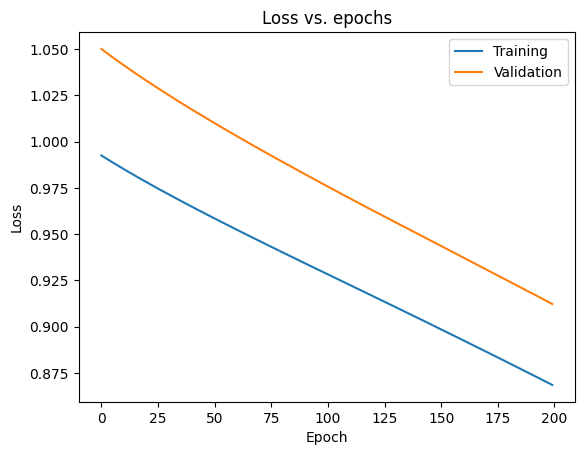

In [ ]:
# plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9252 - mae: 0.7479
Test Mean Squared Error (MSE): 0.8986
Test Mean Absolute Error (MAE): 0.7245


#### lr = 0.001

In [ ]:
### fit your model using lr=0.001, 200 epochs, momentum = 0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE

model = build_model((x_train.shape[1],), lr=0.001, momentum = 0.0)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1
)
model.summary()
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.0831 - mae: 0.7289 - val_loss: 1.0052 - val_mae: 0.7136
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0497 - mae: 0.7272 - val_loss: 0.9896 - val_mae: 0.7183
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0250 - mae: 0.7263 - val_loss: 0.9783 - val_mae: 0.7224
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0060 - mae: 0.7261 - val_loss: 0.9696 - val_mae: 0.7265
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9908 - mae: 0.7265 - val_loss: 0.9625 - val_mae: 0.7300
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9781 - mae: 0.7269 - val_loss: 0.9564 - val_mae: 0.7327
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9671 - mae: 0.7271 - val_loss: 0.9508 - val_mae: 0.7347
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9573 - mae: 0.7269 - val_loss: 0.9454 - val_mae: 0.7360
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.94

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402 (5.48 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

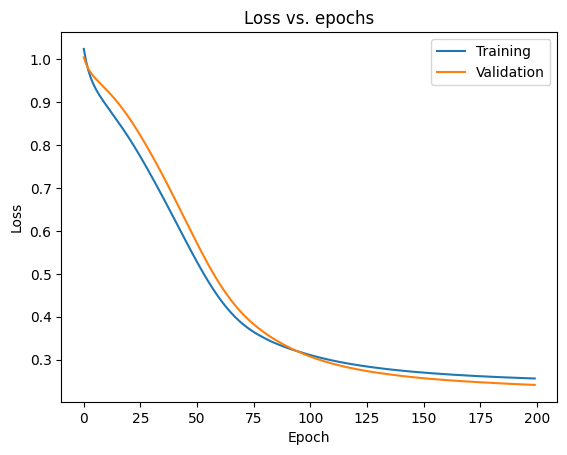

In [ ]:
# plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2227 - mae: 0.3334
Test Mean Squared Error (MSE): 0.2398
Test Mean Absolute Error (MAE): 0.3417


#### lr = 0.1

In [ ]:
### fit your model using lr=0.1, 200 epochs, momentum=0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
model = build_model((x_train.shape[1],), lr=0.1, momentum = 0.0)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1
)
model.summary()
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.7781 - mae: 0.6762 - val_loss: 0.2893 - val_mae: 0.4156
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2994 - mae: 0.3844 - val_loss: 0.2566 - val_mae: 0.3830
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2711 - mae: 0.3537 - val_loss: 0.2359 - val_mae: 0.3461
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2595 - mae: 0.3401 - val_loss: 0.2151 - val_mae: 0.3102
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2484 - mae: 0.3286 - val_loss: 0.2057 - val_mae: 0.2916
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2404 - mae: 0.3207 - val_loss: 0.1993 - val_mae: 0.2780
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2339 - mae: 0.3132 - val_loss: 0.1942 - val_mae: 0.2667
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2281 - mae: 0.3064 - val_loss: 0.1941 - val_mae: 0.2602
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.22

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402 (5.48 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

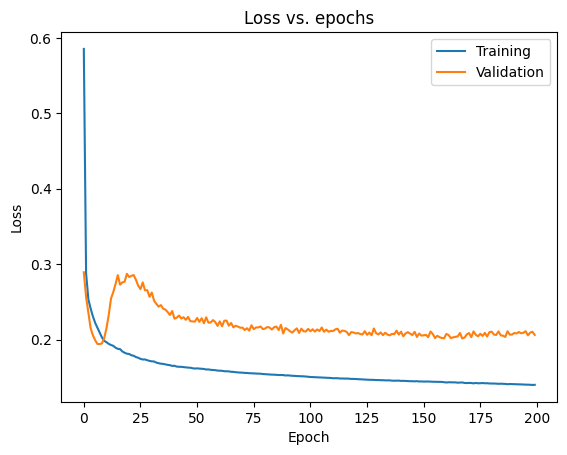

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1581 - mae: 0.2079
Test Mean Squared Error (MSE): 0.1782
Test Mean Absolute Error (MAE): 0.2239


#### Question: What effect did you notice on the learning curve by changing the learning rate ?



1.   at lr = 0.0001: very high errors: the model learned very slowly *underfitting*
2.   at lr = 0.001: major improvement, better learning and convergence
3.   at lr = 0.1: faster learning, but there is some instability   



#### Momentum = 0.3

In [ ]:
### fit your model using lr=0.001, 200 epochs, momentum = 0.3
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
model = build_model((x_train.shape[1],), lr=0.001, momentum = 0.3)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1
)
model.summary()
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.9777 - mae: 0.7922 - val_loss: 0.9802 - val_mae: 0.7975
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9675 - mae: 0.7807 - val_loss: 0.9674 - val_mae: 0.7868
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9581 - mae: 0.7721 - val_loss: 0.9557 - val_mae: 0.7781
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9490 - mae: 0.7652 - val_loss: 0.9445 - val_mae: 0.7705
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9399 - mae: 0.7592 - val_loss: 0.9336 - val_mae: 0.7637
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9308 - mae: 0.7538 - val_loss: 0.9229 - val_mae: 0.7574
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9217 - mae: 0.7487 - val_loss: 0.9124 - val_mae: 0.7516
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9125 - mae: 0.7438 - val_loss: 0.9020 - val_mae: 0.7462
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.90

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,802 (10.95 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,402 (5.48 KB)

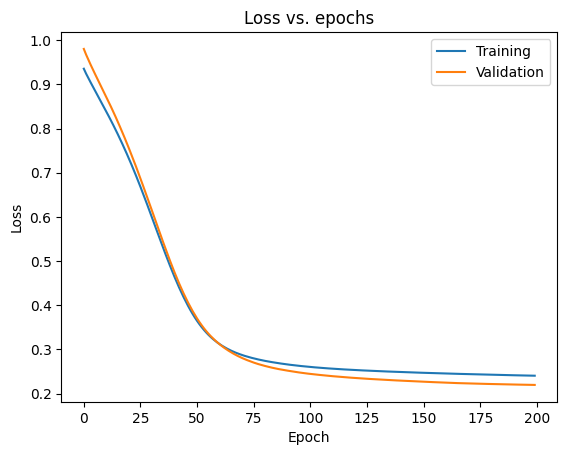

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2256 - mae: 0.3182
Test Mean Squared Error (MSE): 0.2365
Test Mean Absolute Error (MAE): 0.3196


#### Momentum = 0.7

In [ ]:
### fit your model using lr=0.001,  200 epochs, momentum = 0.7
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
model = build_model((x_train.shape[1],), lr=0.001, momentum = 0.7)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1
)
model.summary()
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.0481 - mae: 0.7610 - val_loss: 1.0365 - val_mae: 0.7613
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0377 - mae: 0.7560 - val_loss: 1.0276 - val_mae: 0.7582
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0270 - mae: 0.7512 - val_loss: 1.0195 - val_mae: 0.7554
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0172 - mae: 0.7467 - val_loss: 1.0119 - val_mae: 0.7528
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0079 - mae: 0.7426 - val_loss: 1.0046 - val_mae: 0.7501
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9990 - mae: 0.7387 - val_loss: 0.9974 - val_mae: 0.7475
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9903 - mae: 0.7348 - val_loss: 0.9905 - val_mae: 0.7449
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9815 - mae: 0.7310 - val_loss: 0.9833 - val_mae: 0.7424
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.97

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,802 (10.95 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,402 (5.48 KB)

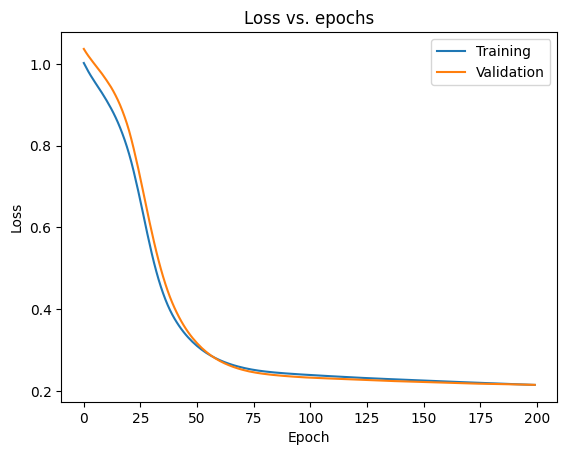

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1858 - mae: 0.2873
Test Mean Squared Error (MSE): 0.2051
Test Mean Absolute Error (MAE): 0.3028


#### Question: What effect did you notice on the learning curve by changing the momentum hyperparameter?

* Higher momentum helps the optimizer move faster and more smooth toward the global mimimum.
* It reduces oscillations and improves convergence speed.

## Neural Network from scratch

<a name='3-2'></a>
You should make sure that your dimensions match between each layer. $n^{[l]}$ is the number of units in layer $l$. For example, if the size of your input $X$ is $(m, f)$ (with m number of samples and f number of features) then:

<table style="width:100%">
    <tr>
        <td>  </td>
        <td> <b>Shape of W</b> </td>
        <td> <b>Shape of b</b>  </td>
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td>
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td>
        <td> $(n^{[1]},f)$ </td>
        <td> $(n^{[1]},1)$ </td>
        <td> $Z^{[1]} = X (W^{[1]})^T + (b^{[1]})^T $ </td>
        <td> $(m, n^{[1]})$ </td>
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td>
        <td> $(n^{[2]}, n^{[1]})$  </td>
        <td> $(n^{[2]},1)$ </td>
        <td>$Z^{[2]} = A^{[1]} (W^{[2]})^T  + (b^{[2]})^T$ </td>
        <td> $(m, n^{[2]})$ </td>
    <tr>
       <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$  </td>
        <td> $\vdots$  </td>
        <td> $\vdots$</td>
        <td> $\vdots$  </td>
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td>
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td>
        <td> $(n^{[L-1]}, 1)$  </td>
        <td>$Z^{[L-1]} =  A^{[L-2]} (W^{[L-1]})^T  + (b^{[L-1]})^T$ </td>
        <td> $(m, n^{[L-1]})$ </td>
   <tr>
   <tr>
       <td> <b>Layer L</b> </td>
        <td> $(n^{[L]}, n^{[L-1]})$ </td>
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  A^{[L-1]} (W^{[L]})^T  + (b^{[L]})^T$</td>
        <td> $(m, n^{[L]})$  </td>
    <tr>
</table>

### Weight initialization

Write the following function to initialize weights and biases for all layers of a neural network. The output should be a dictionary of weights containing weights for all layers. Same for biases.\
For every layer of the network:
- Initialize the weights randomly from a normal distribution of mean = 0 and std = 0.01.
- Initialize the biases with zeros.

Use tensorflow

In [ ]:
def initialize_parameters(layer_dims):
    """
    Initialize parameters (weights and biases).

    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    W, b -- python dictionary containing your parameters:
                    W[l] -- a tf weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b[l] -- a tf bias vector of shape (layer_dims[l], 1)
    """

    tf.random.set_seed(1)
    W = {}
    b = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # W[l] = ...
        # b[l] = ...
        # YOUR CODE STARTS HERE
        W[l]=tf.Variable(
            tf.random.normal(shape=([layer_dims[l], layer_dims[l-1]]), mean=0.0, stddev=0.01),
            dtype=tf.float32
        )

        b[l]=tf.Variable(
            tf.zeros(shape=(layer_dims[l],1)),
            dtype=tf.float32
        )

        # YOUR CODE ENDS HERE

    return W, b

### Forward propagation & Prediction

In [ ]:
def forward_feed(X, W, b):
    '''
    Compute the forward feed of the network.
    For every layer except the final layer, use RELU activation (you can use tensorflow's tf.nn.relu).
    Do not apply any activation function on the final layer (will be applied in another function)

    Arguments:
    X -- the input data (tensor)
    W -- weights dictionary
    b -- biases dictionary

    Returns:
    A -- the outputs of the final layer (without activation)
    '''
    L = len(W) + 1
    A = tf.convert_to_tensor(X, dtype=tf.float32)
    # YOUR CODE STARTS HERE
    for l in range(1, L):
      z=tf.add(tf.matmul(A, tf.transpose(W[l])), tf.transpose(b[l]))
      if l == L-1:
        A = z
      else:
        A = tf.nn.relu(z)
    # YOUR CODE ENDS HERE
    return A

In [ ]:
def predict( X, W, b):
    '''
    Compute the predicted labels. Use forward_feed function and follow it by a softmax layer (you can
    use tensorflow's tf.nn.softmax). Extract the predicted label from the obtained probabilities (it's the label with highest probability).

    Arguments:
    X -- the input data (tensor)
    W -- weights dictionary
    b -- biases dictionary

    Returns:
    pred_labels -- predicted labels (a tensor of predicted class for each data sample (not one-hot))
    '''
    # (≈ 3 lines of code)
    # YOUR CODE STARTS HERE
    ZL = forward_feed(X, W, b)
    probs = tf.nn.softmax(ZL, axis= 1)
    pred_labels = tf.argmax(probs, axis=1)
    # YOUR CODE ENDS HERE
    return pred_labels

### Loss function

In [ ]:
def cross_entropy_loss( logits, Y):
    '''
    Compute the loss, given the predicted logits and true labels.

    Arguments:
    logits -- outputs of the final layer (without softmax) (tensor)
    Y -- true labels (one-hot encodings)

    Returns:
    loss -- computed using tf.nn.softmax_cross_entropy_with_logits. The final output should be averaged over the input data.
    '''

    # YOUR CODE STARTS HERE
    loss_per_sample=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
    loss = tf.reduce_mean(loss_per_sample)
    # YOUR CODE ENDS HERE
    return loss

### Updating the parameters

In [ ]:
def update_params(W, b, dW, db, lr):
    '''
    Loop on all the weights and biases and update them using the discussed equations for parameter update in gradient descent:
    W = W - lr * dw
    b = b - lr * db
    Use tensorflow's assign_sub for subtraction.

    Arguments:
    W, b -- each of them is dictionary of the weights/biases for all layers.
    dW, db -- each of them is dictionary of the gradients of weights/biases for all layers.
    lr -- learning rate

    Returns:
    W, b -- each of them is a dictionary of the weights/biases of all layers after update.
    '''
    # YOUR CODE STARTS HERE
    L = len(W)

    for l in range(1, L+1):
      W[l].assign_sub(lr*dW[l])
      b[l].assign_sub(lr*db[l])
    # YOUR CODE ENDS HERE
    return W, b

### Training loop

In [ ]:
def training_loop(train_iter, layer_dims, loss_fn, num_epochs, lr, batch_size):
    '''
    Training loop.

    Arguments:
    train_iter -- a tensorflow training data iterator, yields a training batch in each loop.
    layer_dims -- a list carrying the number of neurons in each layer. The length of this list represents the number of layers.
    loss_fn -- the function used to compute the loss between true labels and predictions.
    num_epochs -- number of epochs to train for (an integer).
    lr -- learning rate.
    batch_size -- size of one batch of data to be processed for updating the model's weights (an integer).

    Returns:
    history -- a dictionary of the training loss .
    W, b -- the final weights and biases after training.
    '''
    history = {'train_loss': []}
    dW, db = {}, {}

    # Initialize the weights and biases using initialize_parameters function
    # YOUR CODE STARTS HERE
    W, b = initialize_parameters(layer_dims)
    # YOUR CODE ENDS HERE

    for e in range(num_epochs):
        epoch_train_loss = 0.
        print('Epoch {}: '.format(e))

        # loop on the batches from the train_iter
        # for each batch do the following:
            # cast each batch to tf.float32
            # Compute the forward feed of each batch using forward_feed function
            # compute the loss with the true labels of the batch
            # compute the gradients of the batch loss and add them to the dW and db
            # update W and b using update_params function
            # add the batchloss.numpy() to the epoch train loss
        # YOUR CODE STARTS HERE
        step = 0
        for batch_x, batch_y in train_iter:
          step+=1
          batch_x = tf.cast(batch_x, dtype=tf.float32)
          batch_y = tf.cast(batch_y, dtype=tf.float32)

          with tf.GradientTape() as tape:
            logits = forward_feed(batch_x, W, b)
            batch_loss = loss_fn(logits, batch_y)

          grads = tape.gradient(batch_loss, [W[l] for l in W] + [b[l] for l in b])
          num_layers = len(W)
          dw = {l+1: grads[l] for l in range(num_layers)}
          db = {l+1: grads[num_layers+l] for l in range(num_layers)}

          W, b = update_params(W, b, dw, db, lr)

          epoch_train_loss += batch_loss.numpy()
          avg_loss = epoch_train_loss/step
        # YOUR CODE ENDS HERE

        history['train_loss'].append(epoch_train_loss/step)
        print("train loss: ", epoch_train_loss/step)

    return history, W, b

### classification dataset

In [ ]:
# Creating a classification dataset consisting of 1000 samples, 2 features and 3 classes.
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [ ]:
x_train, y_train, x_test, y_test = prepare_data()

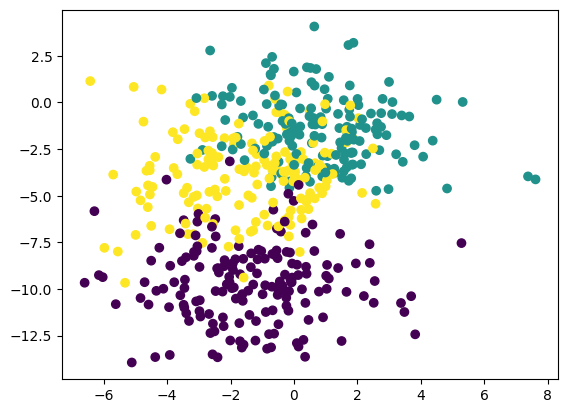

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c = tf.argmax(y_train, axis=1))

### Experiments

#### Batch size = 256

Use your functions to train a network of 3 layers, with number of neurons = 2, 50 and 3 respectively.\
use num of epochs = 200, lr = 0.01, batch_size = 256.\
Use tf.data.Dataset.from_tensor_slices like we did it tutorial to generate the training dataset with the specified batch size.


In [ ]:
# batch_size =  .........
# num_epochs =  ..........
# lr =  ..........
# layer_dims =  ..........
# train_iter =  ................
# history, W, b =  ...................
# YOUR CODE STARTS HERE

batch_size =  256
num_epochs =  200
lr =  0.01
layer_dims =  [2, 50, 3]
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_iter =  train_ds.batch(batch_size)
history, W, b =  training_loop(train_iter, layer_dims, cross_entropy_loss, num_epochs, lr, batch_size)

# YOUR CODE ENDS HERE



Epoch 0: 
train loss:  1.0972272
Epoch 1: 
train loss:  1.0968192
Epoch 2: 
train loss:  1.0964005
Epoch 3: 
train loss:  1.095968
Epoch 4: 
train loss:  1.0955191
Epoch 5: 
train loss:  1.0950537
Epoch 6: 
train loss:  1.0945778
Epoch 7: 
train loss:  1.0940877
Epoch 8: 
train loss:  1.093578
Epoch 9: 
train loss:  1.093043
Epoch 10: 
train loss:  1.092479
Epoch 11: 
train loss:  1.0918844
Epoch 12: 
train loss:  1.091255
Epoch 13: 
train loss:  1.0905874
Epoch 14: 
train loss:  1.0898777
Epoch 15: 
train loss:  1.0891225
Epoch 16: 
train loss:  1.088317
Epoch 17: 
train loss:  1.0874575
Epoch 18: 
train loss:  1.0865402
Epoch 19: 
train loss:  1.085561
Epoch 20: 
train loss:  1.0845149
Epoch 21: 
train loss:  1.0833981
Epoch 22: 
train loss:  1.0822058
Epoch 23: 
train loss:  1.0809336
Epoch 24: 
train loss:  1.0795774
Epoch 25: 
train loss:  1.0781324
Epoch 26: 
train loss:  1.076593
Epoch 27: 
train loss:  1.0749552
Epoch 28: 
train loss:  1.0732145
Epoch 29: 
train loss:  1.071367

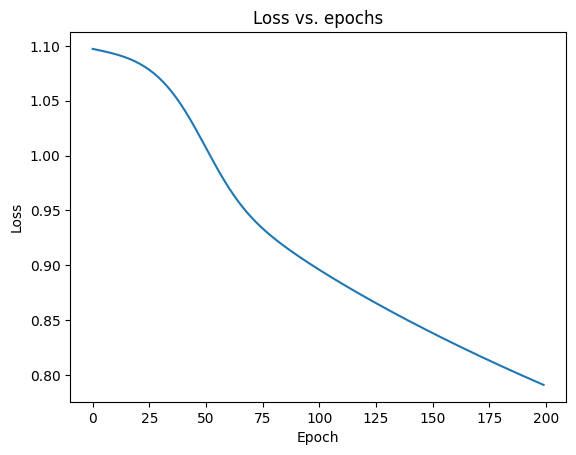

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Batch size = 128

In [ ]:
# Train the model using batch size = 128. (keep the rest of the hyperparameters with the same values as above)
# YOUR CODE STARTS HERE

batch_size =  128
num_epochs =  200
lr =  0.01
layer_dims =  [2, 50, 3]
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_iter =  train_ds.batch(batch_size)
history, W, b =  training_loop(train_iter, layer_dims, cross_entropy_loss, num_epochs, lr, batch_size)

# YOUR CODE ENDS HERE


Epoch 0: 
train loss:  1.0970403
Epoch 1: 
train loss:  1.0962062
Epoch 2: 
train loss:  1.0953126
Epoch 3: 
train loss:  1.0943615
Epoch 4: 
train loss:  1.0933435
Epoch 5: 
train loss:  1.0922191
Epoch 6: 
train loss:  1.0909642
Epoch 7: 
train loss:  1.0895505
Epoch 8: 
train loss:  1.0879462
Epoch 9: 
train loss:  1.0861201
Epoch 10: 
train loss:  1.0840385
Epoch 11: 
train loss:  1.0816666
Epoch 12: 
train loss:  1.0789692
Epoch 13: 
train loss:  1.0759088
Epoch 14: 
train loss:  1.0724488
Epoch 15: 
train loss:  1.0685564
Epoch 16: 
train loss:  1.064203
Epoch 17: 
train loss:  1.0593679
Epoch 18: 
train loss:  1.0540406
Epoch 19: 
train loss:  1.0482256
Epoch 20: 
train loss:  1.041944
Epoch 21: 
train loss:  1.0352362
Epoch 22: 
train loss:  1.0281634
Epoch 23: 
train loss:  1.020804
Epoch 24: 
train loss:  1.0132546
Epoch 25: 
train loss:  1.0056249
Epoch 26: 
train loss:  0.99802643
Epoch 27: 
train loss:  0.9905672
Epoch 28: 
train loss:  0.9833446
Epoch 29: 
train loss:  0.

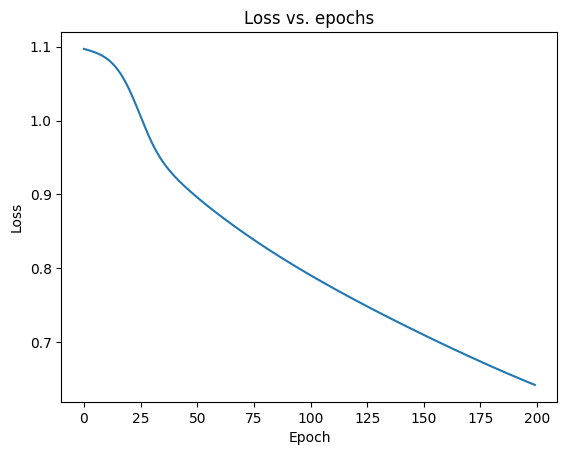

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Batch size = 16

In [ ]:
# Train the model using batch size = 16. (keep the rest of the hyperparameters with the same values as above)
# YOUR CODE STARTS HERE

batch_size =  16
num_epochs =  200
lr =  0.01
layer_dims =  [2, 50, 3]
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_iter =  train_ds.batch(batch_size)
history, W, b =  training_loop(train_iter, layer_dims, cross_entropy_loss, num_epochs, lr, batch_size)

# YOUR CODE ENDS HERE


Epoch 0: 
train loss:  1.0935981
Epoch 1: 
train loss:  1.0784312
Epoch 2: 
train loss:  1.040067
Epoch 3: 
train loss:  0.9809705
Epoch 4: 
train loss:  0.9362783
Epoch 5: 
train loss:  0.90966475
Epoch 6: 
train loss:  0.8885812
Epoch 7: 
train loss:  0.8693668
Epoch 8: 
train loss:  0.8514041
Epoch 9: 
train loss:  0.8344669
Epoch 10: 
train loss:  0.8184544
Epoch 11: 
train loss:  0.80323166
Epoch 12: 
train loss:  0.7887337
Epoch 13: 
train loss:  0.77483606
Epoch 14: 
train loss:  0.7614437
Epoch 15: 
train loss:  0.7484956
Epoch 16: 
train loss:  0.7359226
Epoch 17: 
train loss:  0.72369206
Epoch 18: 
train loss:  0.71175945
Epoch 19: 
train loss:  0.7000961
Epoch 20: 
train loss:  0.6886834
Epoch 21: 
train loss:  0.6775186
Epoch 22: 
train loss:  0.66663057
Epoch 23: 
train loss:  0.65604633
Epoch 24: 
train loss:  0.64580417
Epoch 25: 
train loss:  0.63595504
Epoch 26: 
train loss:  0.62653035
Epoch 27: 
train loss:  0.6175556
Epoch 28: 
train loss:  0.6090678
Epoch 29: 
trai

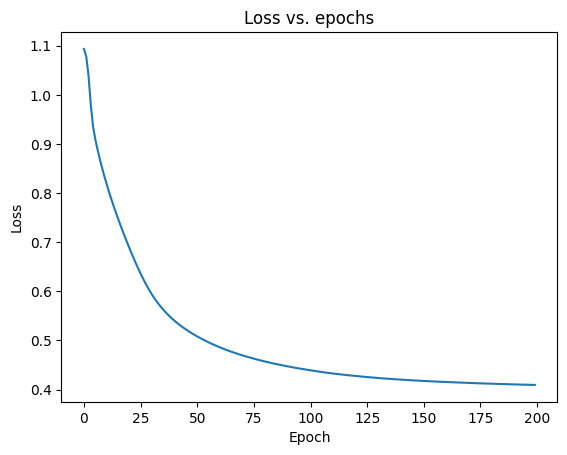

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Question: What effect did you notice by changing the batch size ?



**Batch size = 256**

* The loss decreases slowly and smoothly.

* Training is more stable but converges gradually.

**Batch size = 128**
*   The loss decreases a bit faster while maintaining reasonable stability.

* It’s a balance between stability and convergence speed.

**Batch size = 16**

* The loss drops much faster and reaches a lower final value.


